In [1]:
import pandas as pd
import numpy as np
import csv
import xgboost as xgb

C:\Users\ogbonna\AppData\Local\Programs\Python\Python38-32\DLLs\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import sklearn
from sklearn.model_selection import GridSearchCV

In [5]:
TABLE=pd.read_csv('C:\\Users\\ogbonna\\Desktop\\horr1.csv',index_col='ID')



In [6]:
variables_=TABLE.columns[:-2]
genetic_sex=TABLE.columns[9:10]
phenotypic_sex=TABLE.columns[10:]
X=TABLE[variables_]
y_gen_sex= TABLE[genetic_sex]
y_phen_sex= TABLE[phenotypic_sex]


In [7]:
# CREATING THE TEST AND TRAIN SPLIT
X_train,X_test,y_train_gen_sex,y_test_gen_sex = sklearn.model_selection.train_test_split(X,y_gen_sex,test_size=0.2,random_state=0)

In [16]:
# CREATING THE XGBCLASSIFIER
xgb_clf = xgb.XGBClassifier(n_estimators=1000,learning_rate=0.1,random_state=40,max_depth=5,n_jobs=-1)

In [9]:
# param_test = {'max_depth':range(2,10,2), 'gamma':[0.1,0.2,0.3], 'subsample':[0.8,0.9], 'colsample_bytree':[0.8,0.9], 'reg_alpha': [0.01,0.1,1]}
# grid_search= GridSearchCV(xgb_clf,param_test,n_jobs=-1,cv=5,scoring='accuracy')
# grid_search.fit(X_train,y_train_gen_sex)

In [17]:
# TRAINING THE ALGORITHM TO PREDICT GENETIC SEX
xgb_clf.fit(X_train,y_train_gen_sex)

C:\Users\ogbonna\AppData\Local\Programs\Python\Python38-32\DLLs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ogbonna\AppData\Local\Programs\Python\Python38-32\DLLs\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogbonna\AppData\Local\Programs\Python\Python38-32\DLLs\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[23:04:58] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=40,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
y_pred_gen_sex = xgb_clf.predict(X_test)
sklearn.metrics.accuracy_score(y_test_gen_sex,y_pred_gen_sex)

1.0

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

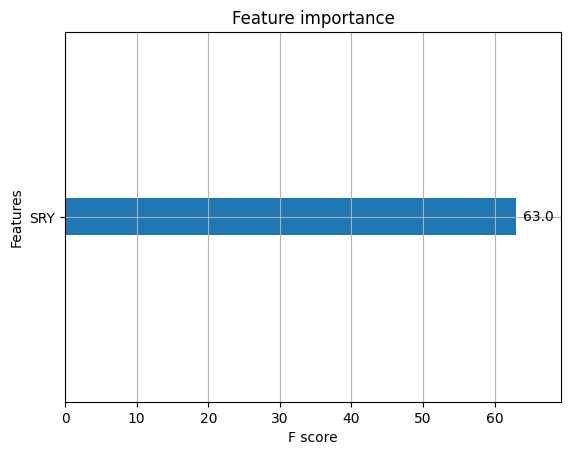

In [19]:
xgb.plot_importance(xgb_clf)

In [20]:
X_train,X_test,y_train_phen_sex,y_test_phen_sex = sklearn.model_selection.train_test_split(X,y_phen_sex,test_size=0.2,random_state=0)

In [21]:
xgb_clf_phen = xgb.XGBClassifier(n_estimators=1000,learning_rate=0.1,random_state=40,max_depth=5,n_jobs=-1)
xgb_clf_phen.fit(X_train,y_train_phen_sex)

C:\Users\ogbonna\AppData\Local\Programs\Python\Python38-32\DLLs\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ogbonna\AppData\Local\Programs\Python\Python38-32\DLLs\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ogbonna\AppData\Local\Programs\Python\Python38-32\DLLs\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

[23:08:34] WARNING: D:\Build\xgboost\xgboost-1.5.1.git\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=40, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [22]:
y_pred_phen_sex = xgb_clf_phen.predict(X_test)
sklearn.metrics.accuracy_score(y_test_phen_sex,y_pred_phen_sex)

C:\Users\ogbonna\AppData\Local\Programs\Python\Python38-32\DLLs\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.995

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

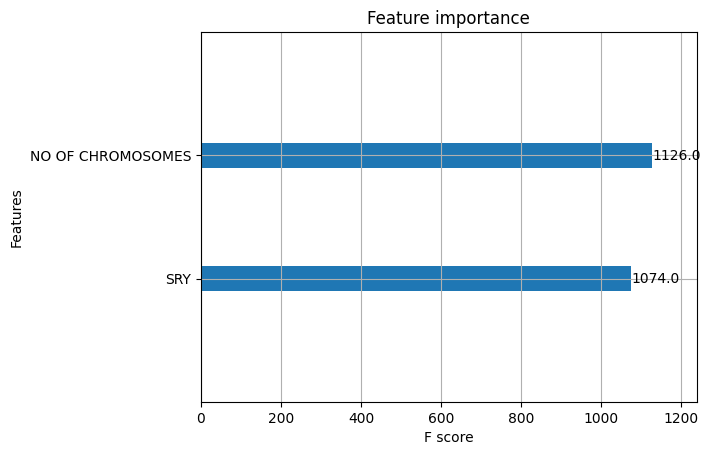

In [23]:
xgb.plot_importance(xgb_clf_phen)